In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Fraud Check Problem

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [4]:
data = pd.read_csv('Fraud_check.csv')

In [5]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
data1 = data.rename({'Marital.Status' : 'Marital_Status', 'Taxable.Income' : 'Taxable_Income', 'City.Population' : 'City_Population', 'Work.Experience' : 'Work_Experience'}, axis = 1)

In [7]:
data1.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
data1.isnull().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

In [ ]:
#Again just like in the previous company data problem we convert the numerical data column 'Taxable_income' to categorical.
#The condition created is as it is provided in the problem statement, taxable_income <= 30000 as "Risky" and others are "Good".

In [10]:
data1.insert(6,'Risk_level'," ")

for i in range(0,len(data1['Taxable_Income']),1):
    if data1['Taxable_Income'].iloc[i]<=30000:
        data1['Risk_level'].iloc[i]='Risky'
    else:
        data1['Risk_level'].iloc[i]='Good'

<ipython-input-10-3c78337e724a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Risk_level'].iloc[i]='Good'
<ipython-input-10-3c78337e724a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Risk_level'].iloc[i]='Risky'


In [11]:
data1.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Risk_level
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [12]:
data1.drop(['Taxable_Income'], axis = 1, inplace = True)
data1.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk_level
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


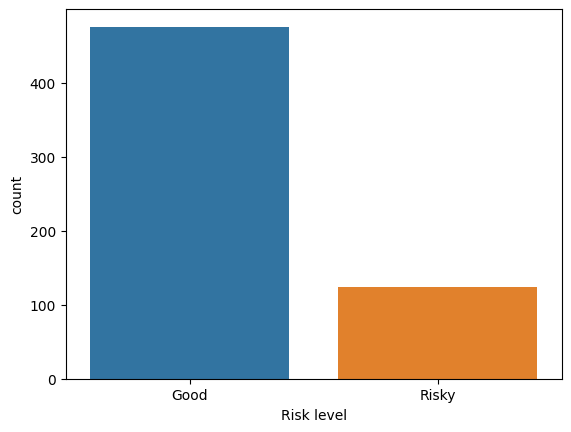

Good     476
Risky    124
Name: Risk_level, dtype: int64

In [18]:
sns.countplot(x='Risk_level',data=data1)
plt.xlabel('Risk level')
plt.ylabel('count')
plt.show()
data1['Risk_level'].value_counts()

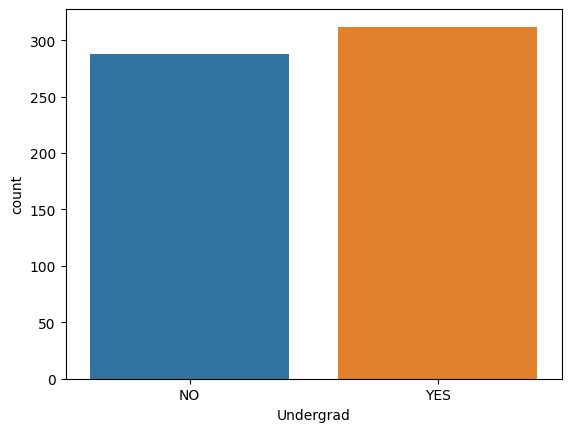

YES    312
NO     288
Name: Undergrad, dtype: int64

In [15]:
sns.countplot(x='Undergrad',data=data1)
plt.xlabel('Undergrad')
plt.ylabel('count')
plt.show()
data1['Undergrad'].value_counts()

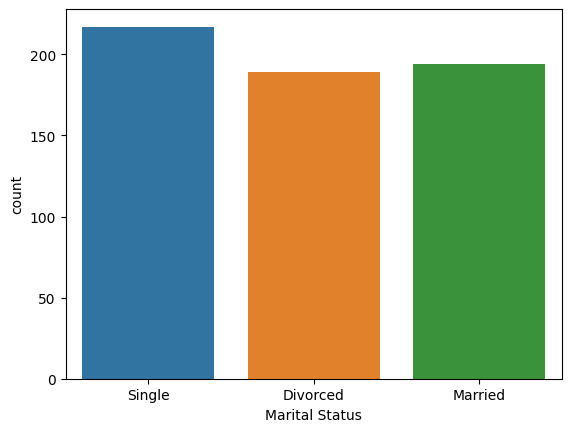

Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64

In [17]:
sns.countplot(x='Marital_Status',data=data1)
plt.xlabel('Marital Status')
plt.ylabel('count')
plt.show()
data1['Marital_Status'].value_counts()

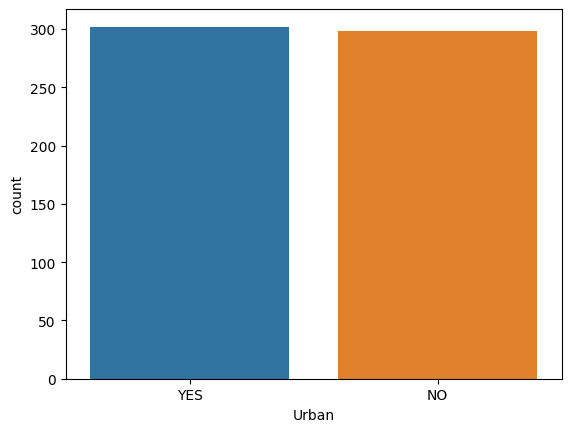

YES    302
NO     298
Name: Urban, dtype: int64

In [19]:
sns.countplot(x='Urban',data=data1)
plt.xlabel('Urban')
plt.ylabel('count')
plt.show()
data1['Urban'].value_counts()

<ipython-input-20-b4d7155abf7b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Work_Experience'])


<Axes: xlabel='Work_Experience', ylabel='Density'>

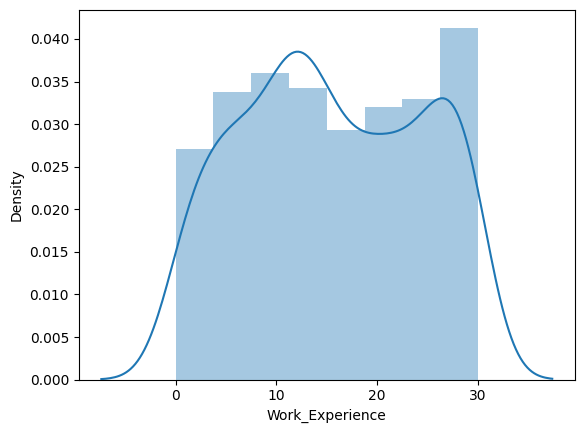

In [20]:
sns.distplot(data1['Work_Experience'])

In [13]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [21]:
data1['Undergrad'] = LE.fit_transform(data1['Undergrad'])
data1['Marital_Status'] = LE.fit_transform(data1['Marital_Status'])
data1['Urban'] = LE.fit_transform(data1['Urban'])
data1['Risk_level'] = LE.fit_transform(data1['Risk_level'])
data1.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk_level
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital_Status   600 non-null    int64
 2   City_Population  600 non-null    int64
 3   Work_Experience  600 non-null    int64
 4   Urban            600 non-null    int64
 5   Risk_level       600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [ ]:
#Creating dependant and independant variables

In [32]:
array = data1.values

In [33]:
x1 = array[:,0:5]
y1 = array[:,5]

In [34]:
x1

array([[     0,      2,  50047,     10,      1],
       [     1,      0, 134075,     18,      1],
       [     0,      1, 160205,     30,      1],
       ...,
       [     0,      0, 154058,      0,      1],
       [     1,      1, 180083,     17,      0],
       [     0,      0, 158137,     16,      0]])

In [35]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
y1.value_counts()

0    476
1    124
Name: Risk_level, dtype: int64

In [ ]:
#Creating a test train split

In [36]:
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10) #Bootstrap

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features,random_state=0)
results = cross_val_score(model, x1, y1, cv=kfold)
print(results.mean())

0.7266666666666666


In [37]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [38]:
x1_train

array([[     0,      0, 199174,     10,      0],
       [     1,      0,  75552,     17,      1],
       [     1,      2,  89965,     16,      1],
       ...,
       [     1,      2, 157299,     11,      0],
       [     1,      1, 126556,     10,      1],
       [     1,      0, 180424,     26,      0]])

In [39]:
y1_train

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [ ]:
#Model buidling and accuracy test

In [40]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features,random_state=0)
model.fit(x1_train, y1_train)

RandomForestClassifier(max_features=5, random_state=0)

In [41]:
result1 = model.score(x1_test, y1_test)
result1

0.7583333333333333

In [42]:
y1_pred = model.predict(x1_test)
y1_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])